<a href="https://colab.research.google.com/github/ssannkkallpp/covidsimulator-/blob/master/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Simulation

In [0]:
import networkx
import matplotlib.pyplot as plt
import random

In [0]:
#population = 135 * (10**7)
population = 30
infected = 100
susceptible = 0
recovered = 0

age_distribution = [35.3, 18.4, 27.6, 13.5, 4.8]
# the above array stores rough percentage composition by populatio of different age groups
# 0-14, 15-24, 25-44, 45-64, 64+
# we colour the nodes in the generated graph based on these values

In [0]:
def spread():
	return 1

In [0]:
def create_graph(size, p):
	G = networkx.erdos_renyi_graph(size, p)
	networkx.draw(G, with_labels=True)
	map = colour_graph(G, size)
	networkx.draw(G, node_color=map, with_labels=True)

In [0]:
def colour_graph(G, size):
	colour_list = {"AD":0, "T":0, "YA":0, "MA":0, "O":0}
	# colour list stores the number of nodes coloured to be classified under each group
	# AD is adolescants(coloured green), T for teenagers(blue), YA for young adults(yellow), MA for middle-aged and O for old.
	# middle aged and older are coloured red
	colour_map = []
	for node in G:
		# we randomly colour each node to match the age distribution as closely as possible
		if ((100.0 * colour_list["AD"])/size) < age_distribution[0]:
			colour_map.append('green')
			colour_list["AD"] += 1
		elif ((100.0 * colour_list["T"])/size) < age_distribution[1]:
			colour_map.append('blue')
			colour_list["T"] += 1

		elif ((100.0 * colour_list["YA"])/size) < age_distribution[2]:
			colour_map.append('yellow')
			colour_list["YA"] += 1

		elif ((100.0 * colour_list["MA"]) / size) < age_distribution[3]:
			colour_map.append('yellow')
			colour_list["MA"] += 1
		#	labels[node] = "MA"


		else:
			colour_map.append('red')
			colour_list["O"] += 1
		#	labels[node] = "O"

	return colour_map

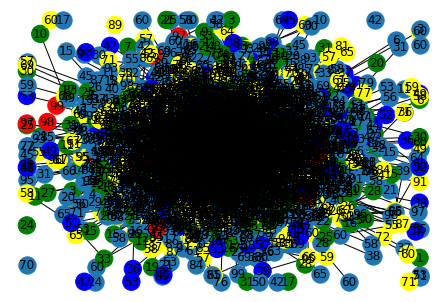

In [13]:
for i in range(1, 30): # seperate connected components for each of the 30 major hubs
  create_graph(100, 0.05)

plt.axis("off")
plt.show()

## In-development
Running these blocks might affect the rest of the code, run them with caution.

In [0]:
def spread(G, size):
	# let us associate a tuple of values with every node
	# (infected->boolean to say if infected or not, duration->duration of being infected, 0 if not infected, age)
	while True:
		random_node = choice(G.nodes())
		if random_node[0] == 1:
			
			time_frame = random_node[1]
			if time_frame in range()

In [0]:
def create_graph(size, p):
	G = networkx.erdos_renyi_graph(size, p)
	positions = networkx.spring_layout(G)
	map = colour_graph(G, size)
  labels = {}
	count = 0
	for node in G:
		if (random.randint(0,1) == 1) and count < infected:
			labels[node] = "I"
			count = count + 1
		else:
			labels[node] = "S"

		# initially we give the infected label randomly to some percentage of the population
		# and everyone else is initially susceptible 
	networkx.draw(G, node_color=map, with_labels=True)
  networkx.draw_network_labels(G, positions, labels, font_size=16,font_color='black'))